## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Funções

## Carregando a Base

In [2]:
# Caso 
df = pd.read_csv("./Bases/base.csv")

## Análise Exploratória

Verificando as colunas presentes no df:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19762 entries, 1455 to 17593
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            19762 non-null  datetime64[ns]
 1   state                           19762 non-null  object        
 2   confirmed                       19762 non-null  int64         
 3   deaths                          19762 non-null  int64         
 4   order_for_place                 19762 non-null  int64         
 5   is_last                         19762 non-null  bool          
 6   estimated_population            19762 non-null  float64       
 7   confirmed_per_100k_inhabitants  19756 non-null  float64       
 8   death_rate                      19762 non-null  float64       
 9   confirmed_daily                 19762 non-null  float64       
 10  deaths_daily                    19762 non-null  float64       
 11  deat

In [3]:
# Convertendo Coluna date para datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Ordenar o dataframe por state e date para garantir que as datas estejam em ordem
df = df.sort_values(by=['state', 'date'])

# Agrupar por estado e calcular a diferença dia a dia
df['confirmed_daily'] = df.groupby('state')['confirmed'].diff().fillna(df['confirmed'])
df['deaths_daily'] = df.groupby('state')['deaths'].diff().fillna(df['deaths'])
df['death_rate_daily'] = df['deaths_daily'] / df['confirmed_daily']

In [4]:
df.describe().T

c:\Users\Luiza Simoes\OneDrive - Qualidados Engenharia e Informatica\Documentos\Qualidados\QRPA - Processo 14\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,min,25%,50%,75%,max,std
date,19762,2021-03-17 23:14:49.343183872,2020-02-25 00:00:00,2020-09-14 00:00:00,2021-03-17 00:00:00,2021-09-17 00:00:00,2022-03-27 00:00:00,NaN
confirmed,19762.0,465498.105354,0.0,85816.5,244257.5,539522.75,5232374.0,688475.302036
deaths,19762.0,12465.451624,0.0,1842.0,6043.5,13558.5,167110.0,21652.086659
order_for_place,19762.0,366.612337,1.0,183.25,366.0,549.0,750.0,211.548197
estimated_population,19762.0,7913264.095233,631181.0,2809394.0,4064052.0,9616621.0,46289333.0,9188175.447382
confirmed_per_100k_inhabitants,19756.0,6951.675635,0.00216,2355.830548,6128.78199,10544.970693,25521.03172,5490.161951
death_rate,19762.0,0.02639,0.0,0.0195,0.0234,0.0281,0.2222,0.014829
confirmed_daily,19762.0,1510.461492,-12028.0,189.0,618.0,1535.75,105200.0,3032.264866
deaths_daily,19762.0,33.354873,-84.0,3.0,11.0,31.0,1389.0,74.475117
death_rate_daily,19574.0,inf,-0.972727,0.009317,0.01989,0.035831,inf,NaN


- Verificando Nulos

In [5]:
df.isnull().sum()

date                                0
state                               0
confirmed                           0
deaths                              0
order_for_place                     0
is_last                             0
estimated_population                0
confirmed_per_100k_inhabitants      6
death_rate                          0
confirmed_daily                     0
deaths_daily                        0
death_rate_daily                  188
dtype: int64

- Eliminando Duplicadas

In [6]:
df.drop_duplicates()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,confirmed_daily,deaths_daily,death_rate_daily
1455,2020-03-17,AC,3,0,1,False,894470.0,0.33539,0.0000,3.0,0.0,0.000000
1454,2020-03-18,AC,3,0,2,False,894470.0,0.33539,0.0000,0.0,0.0,NaN
1453,2020-03-19,AC,4,0,3,False,894470.0,0.44719,0.0000,1.0,0.0,0.000000
1452,2020-03-20,AC,7,0,4,False,894470.0,0.78259,0.0000,3.0,0.0,0.000000
1451,2020-03-21,AC,11,0,5,False,894470.0,1.22978,0.0000,4.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17597,2022-03-21,TO,302166,4141,690,False,1590248.0,19001.18724,0.0137,300.0,1.0,0.003333
17596,2022-03-22,TO,302289,4141,691,False,1590248.0,19008.92188,0.0137,123.0,0.0,0.000000
17595,2022-03-23,TO,302387,4142,692,False,1590248.0,19015.08444,0.0137,98.0,1.0,0.010204
17594,2022-03-24,TO,302443,4142,693,False,1590248.0,19018.60590,0.0137,56.0,0.0,0.000000


##

## Análise Univariada

- Date

In [7]:
print(f"Date mínimo = {df['date'].min()}")
print(f"Date máximo = {df['date'].max()}")

Date mínimo = 2020-02-25 00:00:00
Date máximo = 2022-03-27 00:00:00


- estimated_population

Text(0.5, 1.0, 'Distribuição da População Estimada')

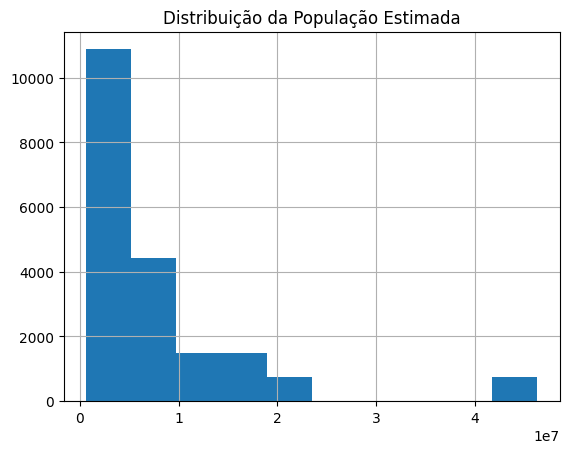

In [23]:
df['estimated_population'].hist()
plt.title('Distribuição da População Estimada')

- confirmed_daily e deaths_Daily

<Axes: >

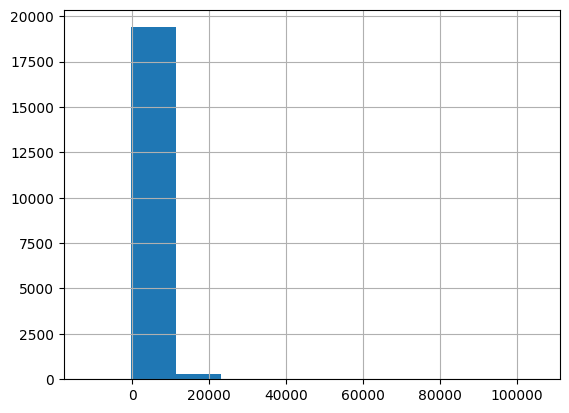

In [26]:
df['confirmed_daily'].hist()

<Axes: >

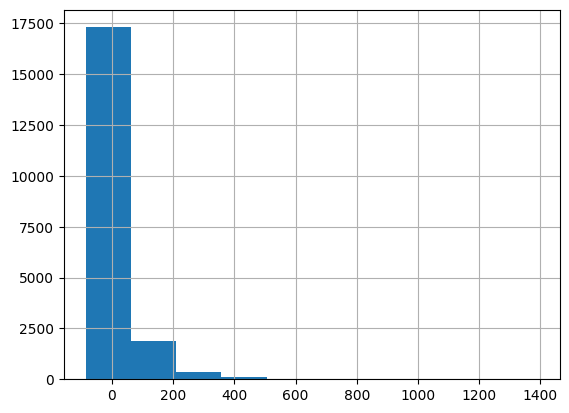

In [10]:
df['deaths_daily'].hist()

## Análise Bivariada

### Séries Temporais

- Série Temporal por dia

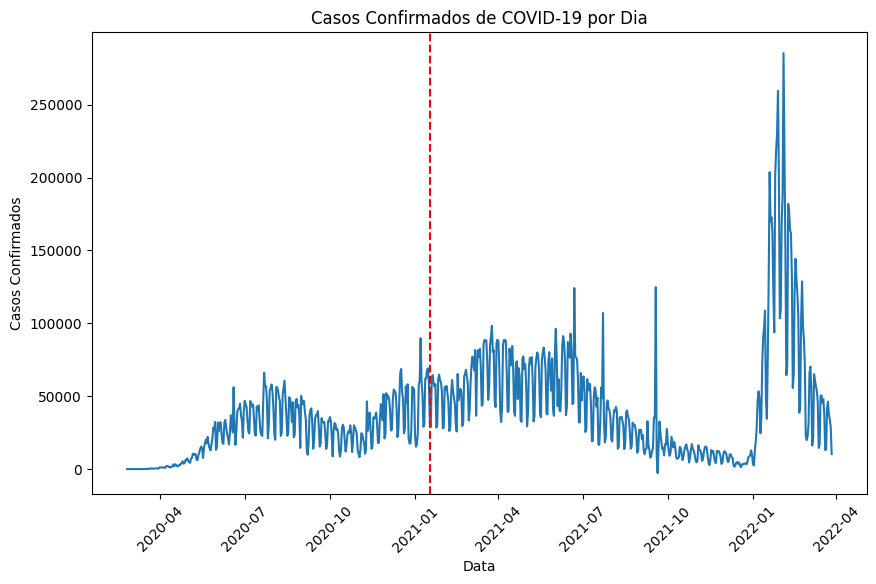

In [27]:
# Resampleando os dados por dia
df_resampled = df.resample('D', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Dia')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


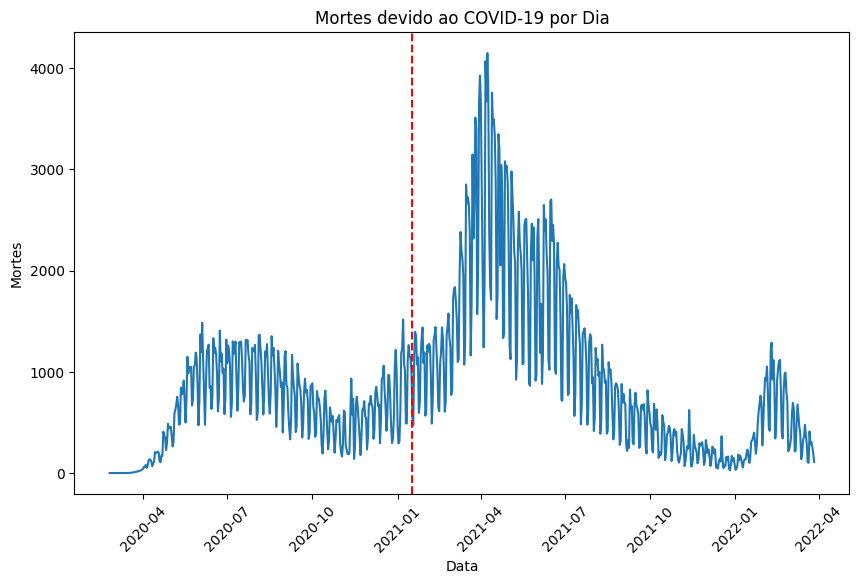

In [12]:
# Resampleando os dados por dia
df_resampled = df.resample('D', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Mortes devido ao COVID-19 por Dia')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.xticks(rotation=45)

plt.show()


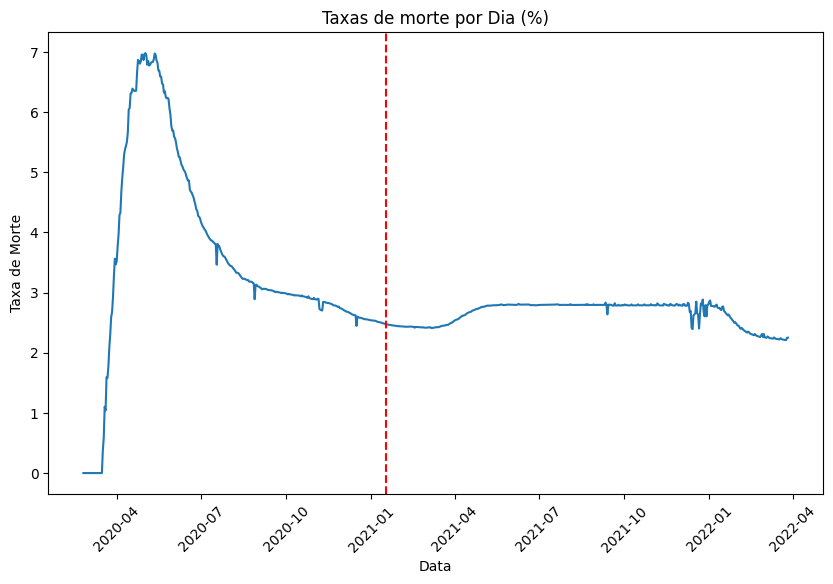

In [13]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('D', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Dia (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

- Série Temporal por Semana

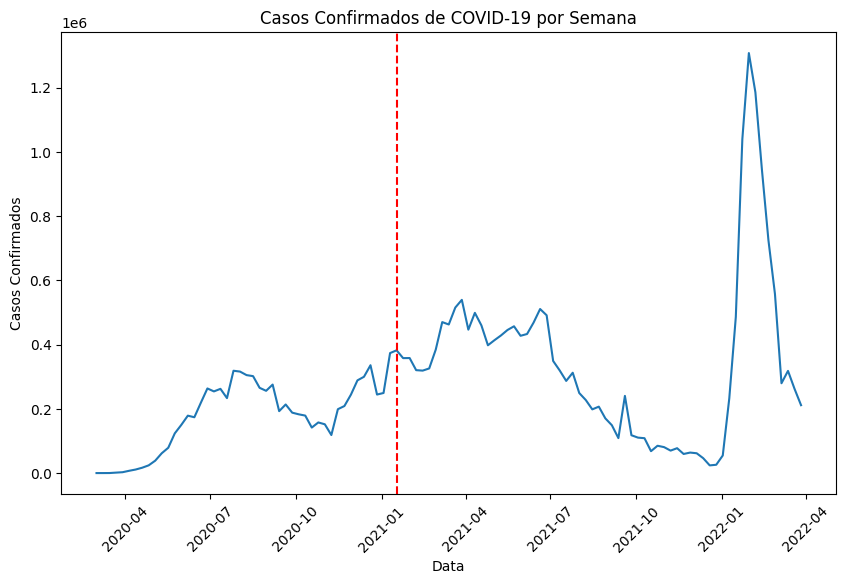

In [14]:
# Resampleando os dados por dia
df_resampled = df.resample('W', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Semana')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


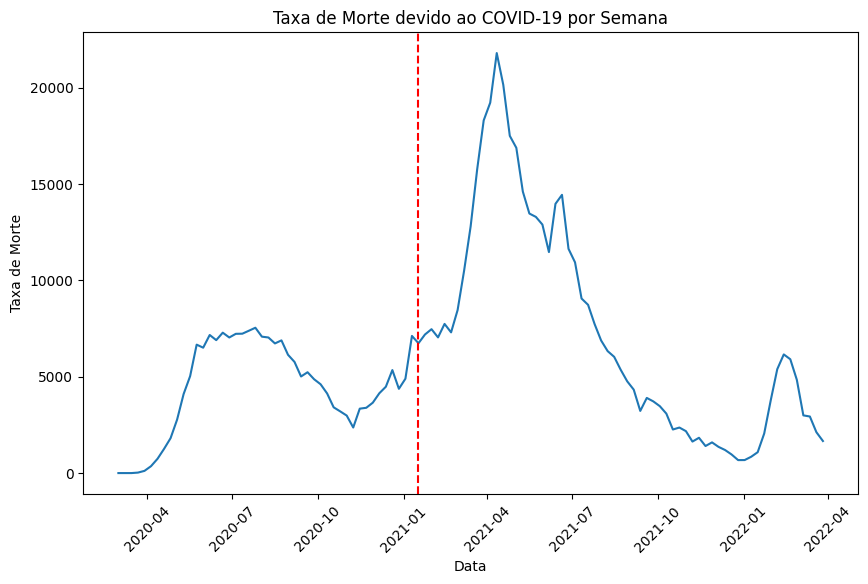

In [15]:
# Resampleando os dados por dia
df_resampled = df.resample('W', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxa de Morte devido ao COVID-19 por Semana')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()


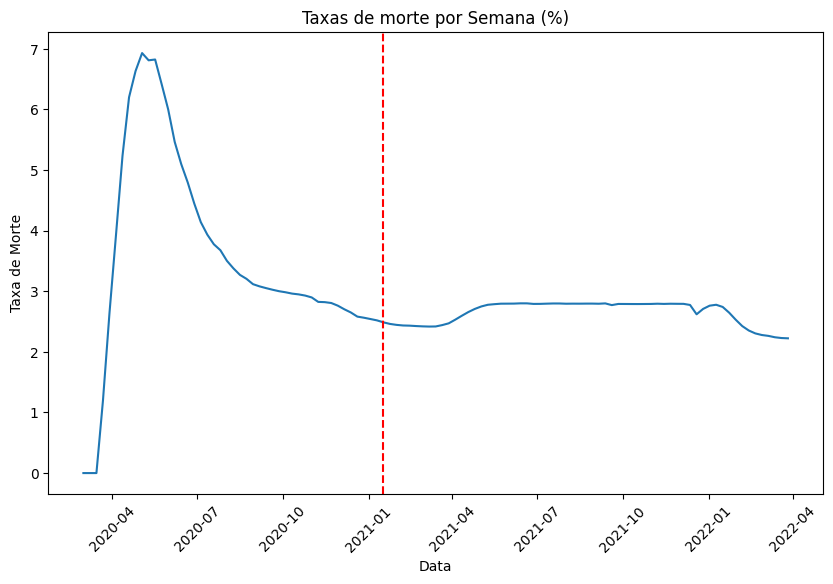

In [16]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('W', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Semana (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

- Série Temporal por mês

C:\Users\Luiza Simoes\AppData\Local\Temp\ipykernel_15888\437576797.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


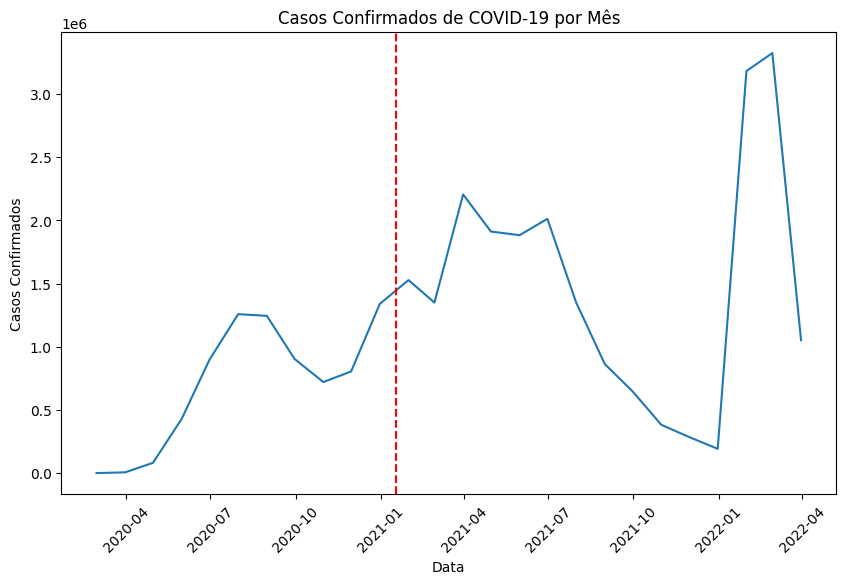

In [17]:
# Resampleando os dados por dia
df_resampled = df.resample('M', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Mês')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


C:\Users\Luiza Simoes\AppData\Local\Temp\ipykernel_15888\515525062.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


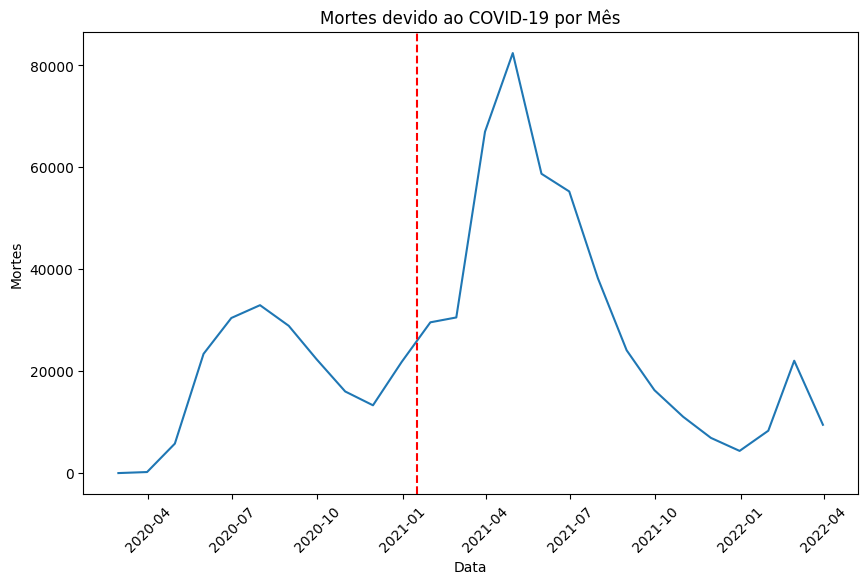

In [18]:
# Resampleando os dados por dia
df_resampled = df.resample('M', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Mortes devido ao COVID-19 por Mês')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.xticks(rotation=45)

plt.show()


C:\Users\Luiza Simoes\AppData\Local\Temp\ipykernel_15888\1415844574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


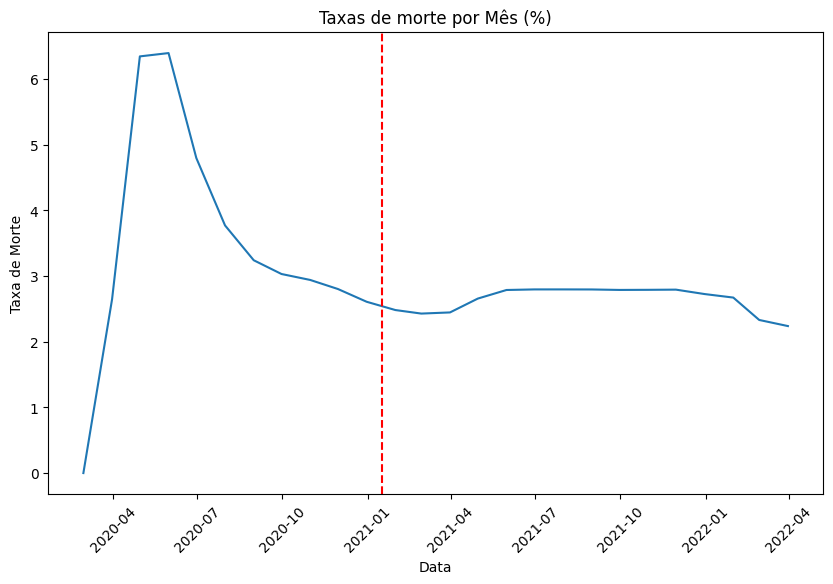

In [19]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('M', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Mês (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

#### Desenvolvendo uma análise de correlação para entender onde as mortes podem estar acontecendo mais frequentemente:

<Axes: >

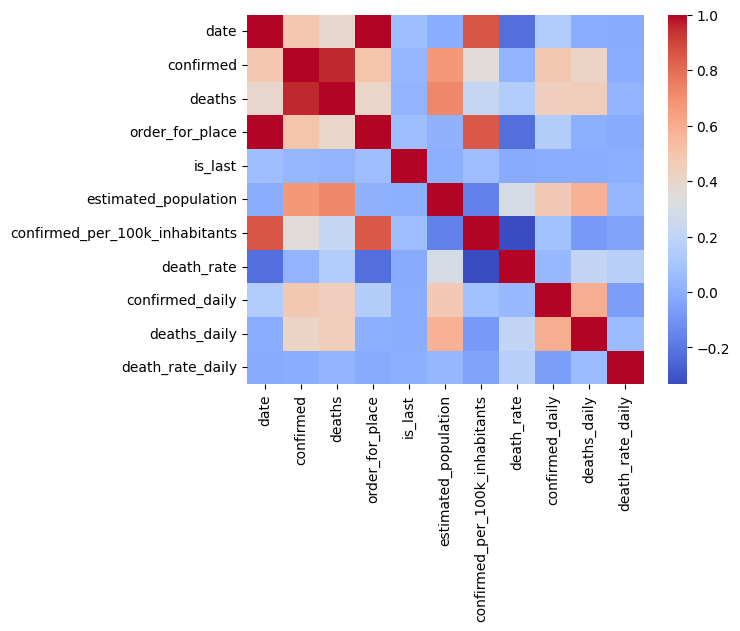

In [44]:
df_quant = df.loc[:, ~df.columns.isin(['state'])]
df_quant_corr = df_quant.corr()

sns.heatmap(df_quant_corr, cmap='coolwarm')

Pode-se perceber que o número de mortes está diretamente correlacionado com o número de casos confirmados, o que acaba sendo algo óbvio. No entanto, a taxa de mortes (death_rate) é inversamente correlacionada o número de casos confirmados a cada 100k habitantes, o que é curioso. Essa correlação de 0.0177 sugere que a taxa de mortalidade depende de outros fatores, como qualidade do atendimento médico, demografia, e a presença de comorbidades, não estando diretamente conectada a quantidade de habitantes.

Mortes por estado:

<Axes: xlabel='state', ylabel='deaths'>

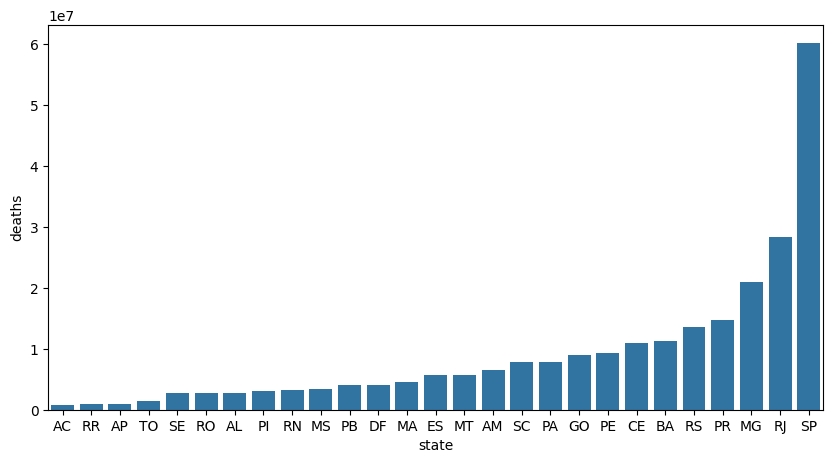

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(df.groupby('state')['deaths'].sum().sort_values())

Taxa de mortes por estado:

<Axes: xlabel='state', ylabel='death_rate'>

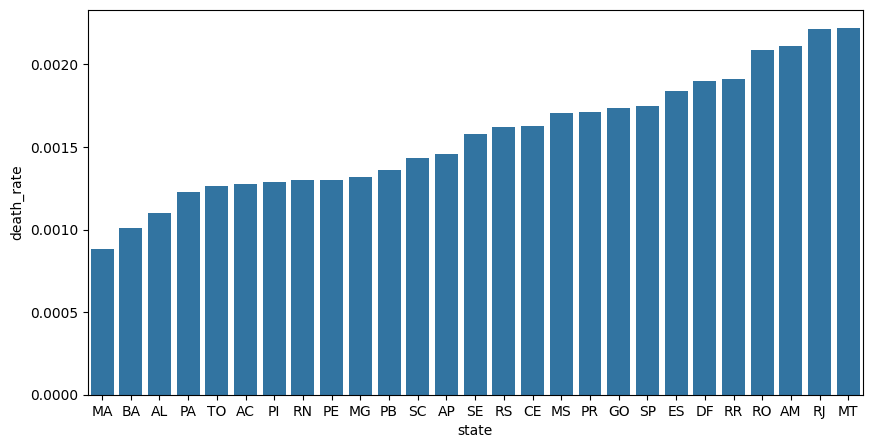

In [69]:
df_death_rate_state = df.groupby('state')[['deaths', 'estimated_population']].sum()
df_death_rate_state['death_rate'] = df_death_rate_state['deaths'].combine(df_death_rate_state['estimated_population'], lambda x, y: x/y)

plt.figure(figsize=(10, 5))
sns.barplot(df_death_rate_state.sort_values('death_rate'), x='state', y='death_rate')

Apesar de São Paulo ter o maior número de mortes, ele vem em 8º lugar em relação taxa de mortes, porque apresenta um número menor de mortes quando comparada a população total do que outros estados. Isso significa que, proporcionalmente, outras regiões com populações menores podem estar enfrentando uma situação mais severa, indicando que a carga sobre o sistema de saúde é distribuída de forma desigual.

Ao avaliar dados de mortalidade, é importante considerar tanto os números absolutos quanto os proporcionais (por 100 mil habitantes) para desenvolver estratégias de saúde pública mais eficazes e equitativas.